In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_curve,auc

In [2]:
data=pd.read_csv("Dry_Eye_Dataset.csv")
data.head(5)

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

# EDA 

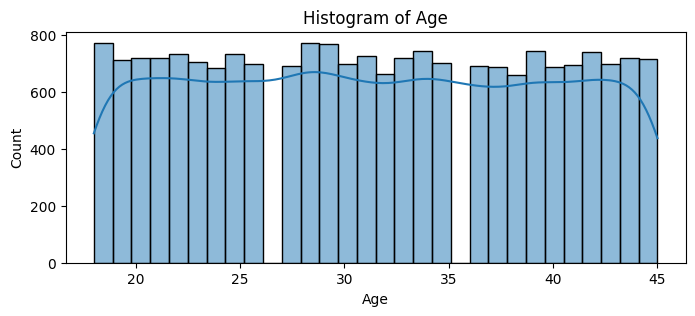

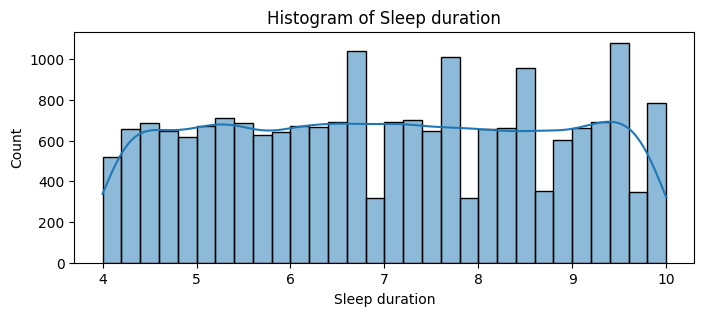

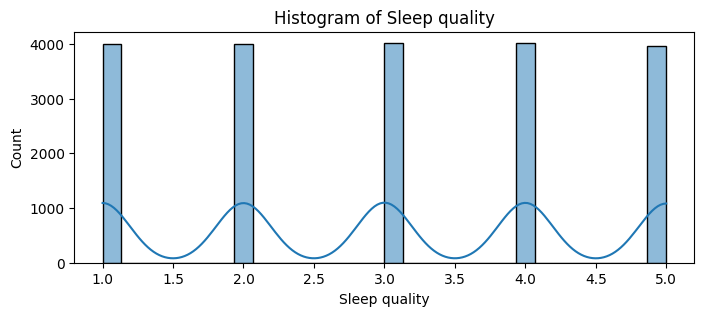

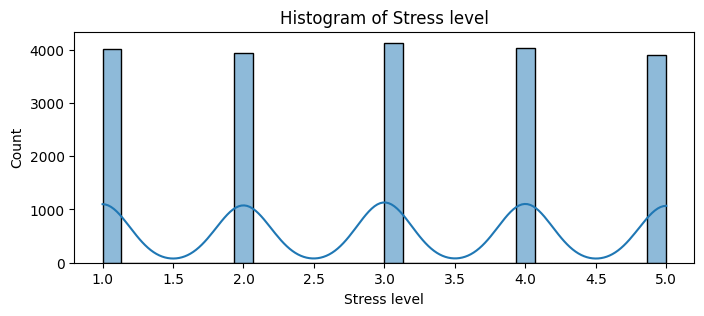

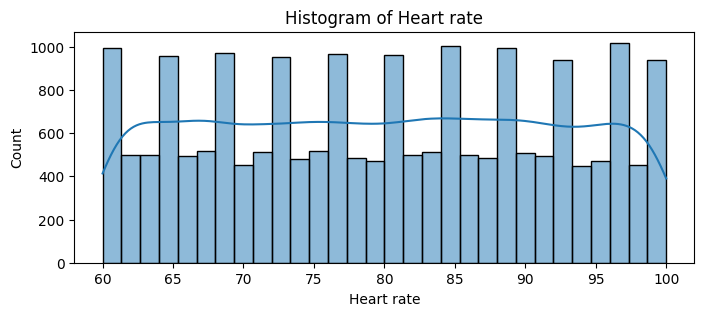

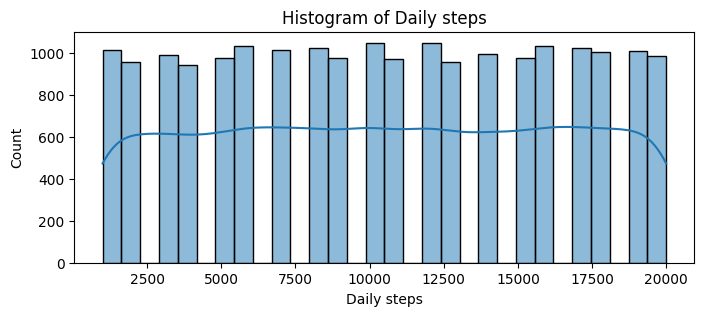

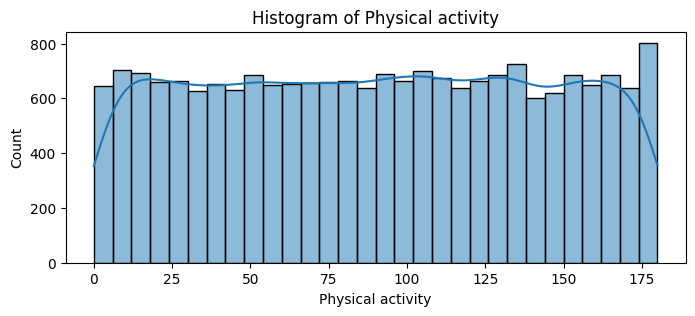

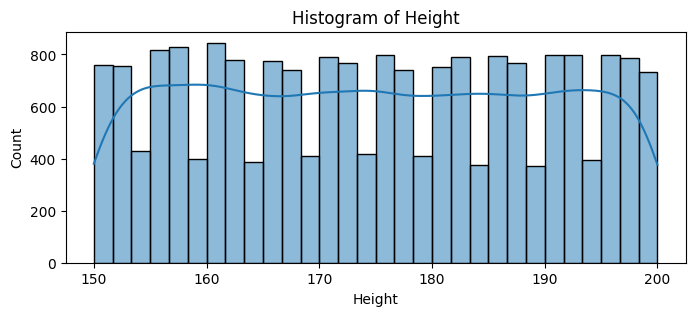

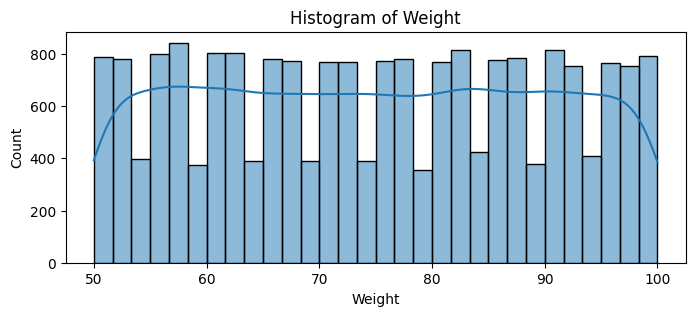

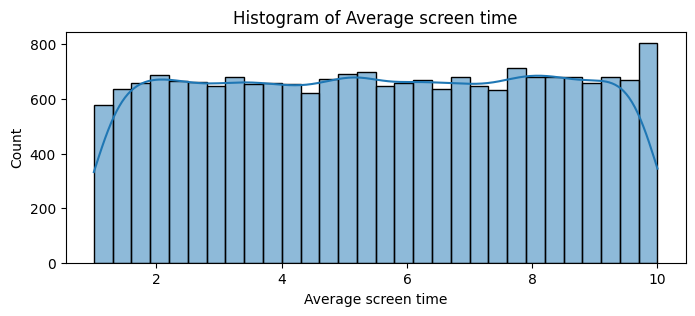

In [4]:
numerical_col=data.select_dtypes(include="number")
for col in numerical_col.columns:
    plt.figure(figsize=(8,3))
    sns.histplot(data=numerical_col[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()

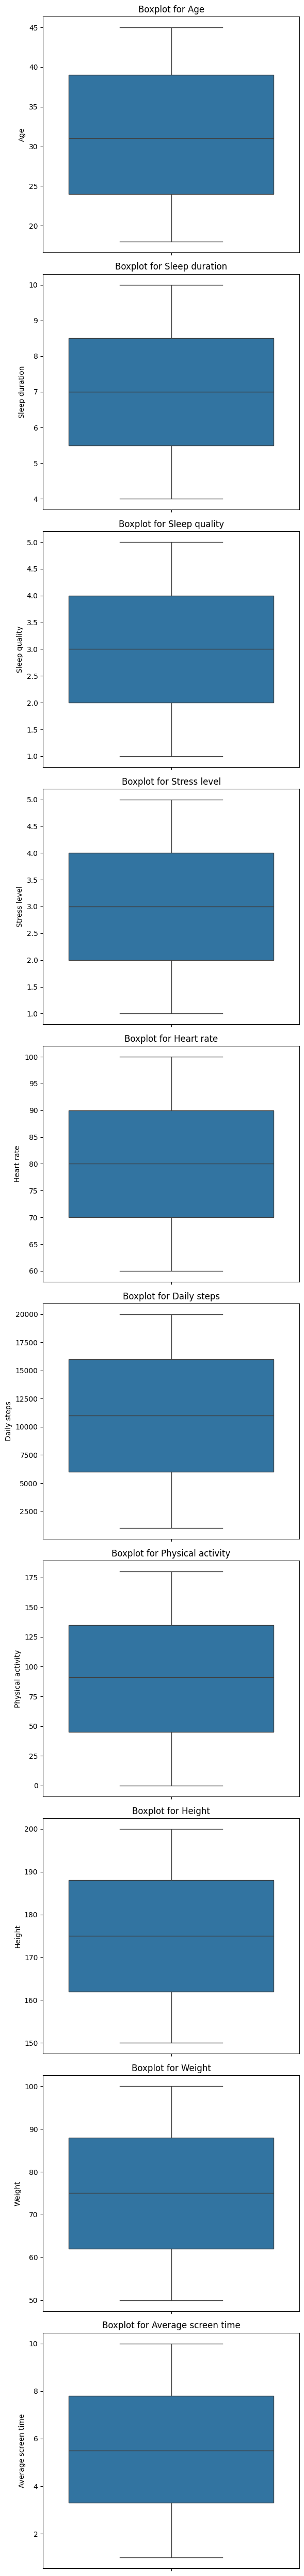

In [5]:
plt.figure(figsize=(6, 5 * len(numerical_col.columns)))  
for i, col in enumerate(numerical_col.columns, 1):
    plt.subplot(len(numerical_col.columns), 1, i) 
    sns.boxplot(data=numerical_col[col])
    plt.title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()

# Feature Engineering

In [6]:
object_col=data.select_dtypes(include="object")
data[object_col.columns] = object_col.replace({"Y": 1, "N": 0}) 

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_78344/1747666313.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[object_col.columns] = object_col.replace({"Y": 1, "N": 0})


In [7]:
data["Gender"]=data["Gender"].replace({"F":1,"M":0})

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_78344/2015654894.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"]=data["Gender"].replace({"F":1,"M":0})


In [8]:
le=LabelEncoder()
data["Blood pressure"]=le.fit_transform(data["Blood pressure"])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  int64  
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  int64  
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  int64  
 12  Wake up during night         20000 non-null  int64  
 13  Feel sleepy duri

<Axes: >

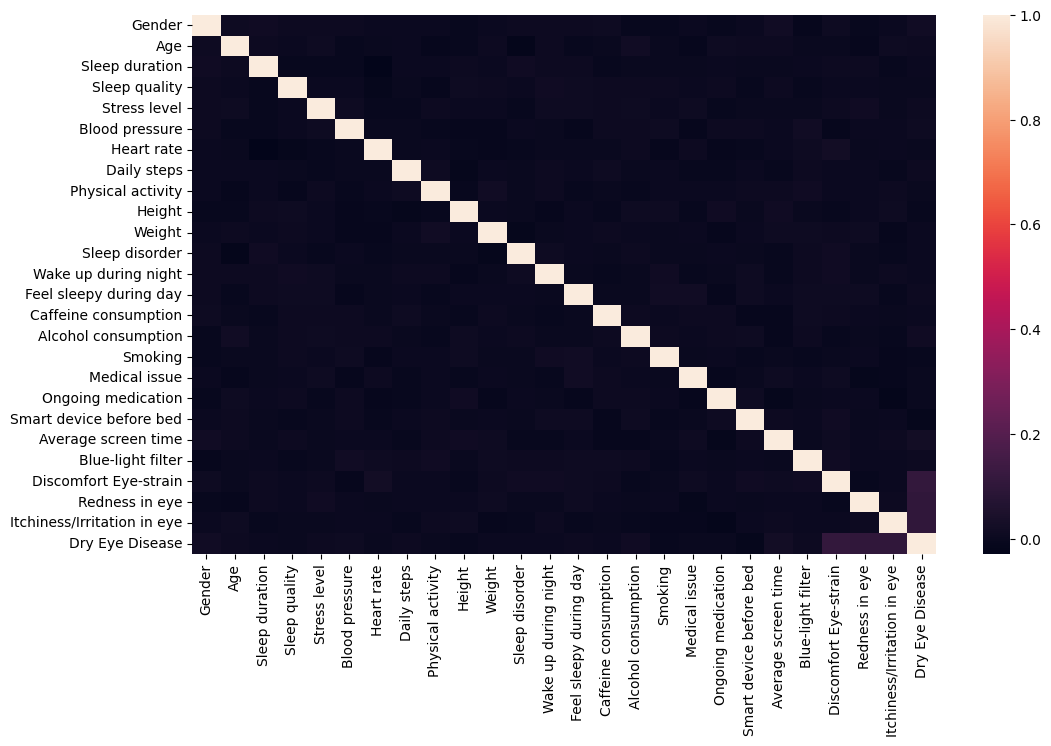

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr())

In [11]:
data.corr()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
Gender,1.000000,0.007612,0.014073,0.005695,0.006703,0.004377,0.000208,0.000505,0.000253,-0.006942,...,-0.005905,0.001269,-0.005377,0.001701,0.018310,-0.009805,0.010110,-0.007337,0.000282,0.016321
Age,0.007612,1.000000,0.004857,0.002513,0.008379,-0.006273,-0.001196,0.001302,-0.009191,-0.005171,...,-0.003293,-0.010528,0.007507,0.003810,0.003177,-0.002508,-0.001069,-0.010335,0.009893,0.005258
Sleep duration,0.014073,0.004857,1.000000,-0.006892,-0.006088,-0.005137,-0.029175,0.002823,0.001858,0.005259,...,-0.003637,-0.001804,-0.000208,-0.003081,-0.004208,0.002034,0.006544,0.004315,-0.007170,-0.000874
Sleep quality,0.005695,0.002513,-0.006892,1.000000,0.000721,-0.000433,-0.014326,-0.003074,-0.010329,0.009380,...,0.006971,0.000297,0.005858,-0.005133,0.004697,-0.007969,0.001459,0.002843,-0.002597,-0.004990
Stress level,0.006703,0.008379,-0.006088,0.000721,1.000000,0.007032,-0.008332,-0.005978,0.004272,-0.000651,...,0.001165,0.010931,-0.008172,-0.002450,-0.001344,-0.002317,0.003889,0.011989,-0.004114,0.005481
Blood pressure,0.004377,-0.006273,-0.005137,-0.000433,0.007032,1.000000,-0.004331,-0.001340,-0.006392,-0.012364,...,0.010502,-0.009154,0.003406,0.003655,-0.000365,0.016279,-0.009773,0.001880,-0.000066,0.010954
Heart rate,0.000208,-0.001196,-0.029175,-0.014326,-0.008332,-0.004331,1.000000,-0.001899,0.001334,-0.005229,...,-0.010954,0.003898,-0.012871,-0.007891,0.002467,0.008719,0.019235,-0.004331,-0.000182,-0.002083
Daily steps,0.000505,0.001302,0.002823,-0.003074,-0.005978,-0.001340,-0.001899,1.000000,0.008413,-0.016801,...,0.001810,-0.006352,-0.007528,-0.000237,-0.008670,0.006512,0.000107,0.000735,-0.008069,0.005664
Physical activity,0.000253,-0.009191,0.001858,-0.010329,0.004272,-0.006392,0.001334,0.008413,1.000000,-0.005989,...,-0.000228,-0.000766,0.002152,0.004275,0.006469,0.012624,0.001386,0.000689,0.004153,-0.003289
Height,-0.006942,-0.005171,0.005259,0.009380,-0.000651,-0.012364,-0.005229,-0.016801,-0.005989,1.000000,...,0.008979,-0.006909,0.012976,-0.004522,0.012817,-0.002263,-0.008730,0.000840,0.007321,-0.006437


In [12]:
x=data.drop(["Dry Eye Disease"],axis=1)
y=data["Dry Eye Disease"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Classifiers

In [13]:
models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "Perceptron": Perceptron(),
    "SGD Classifier": SGDClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Support Vector Classifier (SVC)": SVC(),
    "Nu-Support Vector Classifier": NuSVC(),
    "Linear SVC": LinearSVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

# Results

In [14]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall':[]
}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    metrics['Precision'].append(precision * 100)
    metrics['Recall'].append(recall * 100)
    print(f"Model: {name}")
    print(f"Accuracy: {acc*100}")
    print(f"Precision: {precision*100}")
    print(f"Recall: {recall*100}")
    print(f"Recall: {f1*100}")
    print("-" * 30)

Model: Random Forest Classifier
Accuracy: 69.92
Precision: 71.06102003642987
Recall: 93.0530709600477
Recall: 80.58352698166796
------------------------------
Model: Decision Tree Classifier
Accuracy: 56.599999999999994
Precision: 68.74604179860671
Recall: 64.72868217054264
Recall: 66.67690417690417
------------------------------


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost Classifier
Accuracy: 68.78
Precision: 69.5870657636006
Recall: 94.96124031007753
Recall: 80.31774051191528
------------------------------
Model: Gradient Boosting Classifier
Accuracy: 70.17999999999999
Precision: 71.19453924914676
Recall: 93.29159212880143
Recall: 80.75880758807588
------------------------------
Model: Bagging Classifier
Accuracy: 61.839999999999996
Precision: 70.7163323782235
Recall: 73.58378056052474
Recall: 72.12156633547633
------------------------------
Model: Extra Trees Classifier
Accuracy: 69.78
Precision: 71.06285714285714
Recall: 92.69528920691711
Recall: 80.45025229654547
------------------------------
Model: Logistic Regression
Accuracy: 69.22
Precision: 69.94943943723896
Recall: 94.87179487179486
Recall: 80.52638238643553
------------------------------
Model: Ridge Classifier
Accuracy: 68.72
Precision: 69.3890814558059
Recall: 95.4979129397734
Recall: 80.37641154328733
------------------------------
Model: Perceptron
Accuracy: 51.1600000000

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


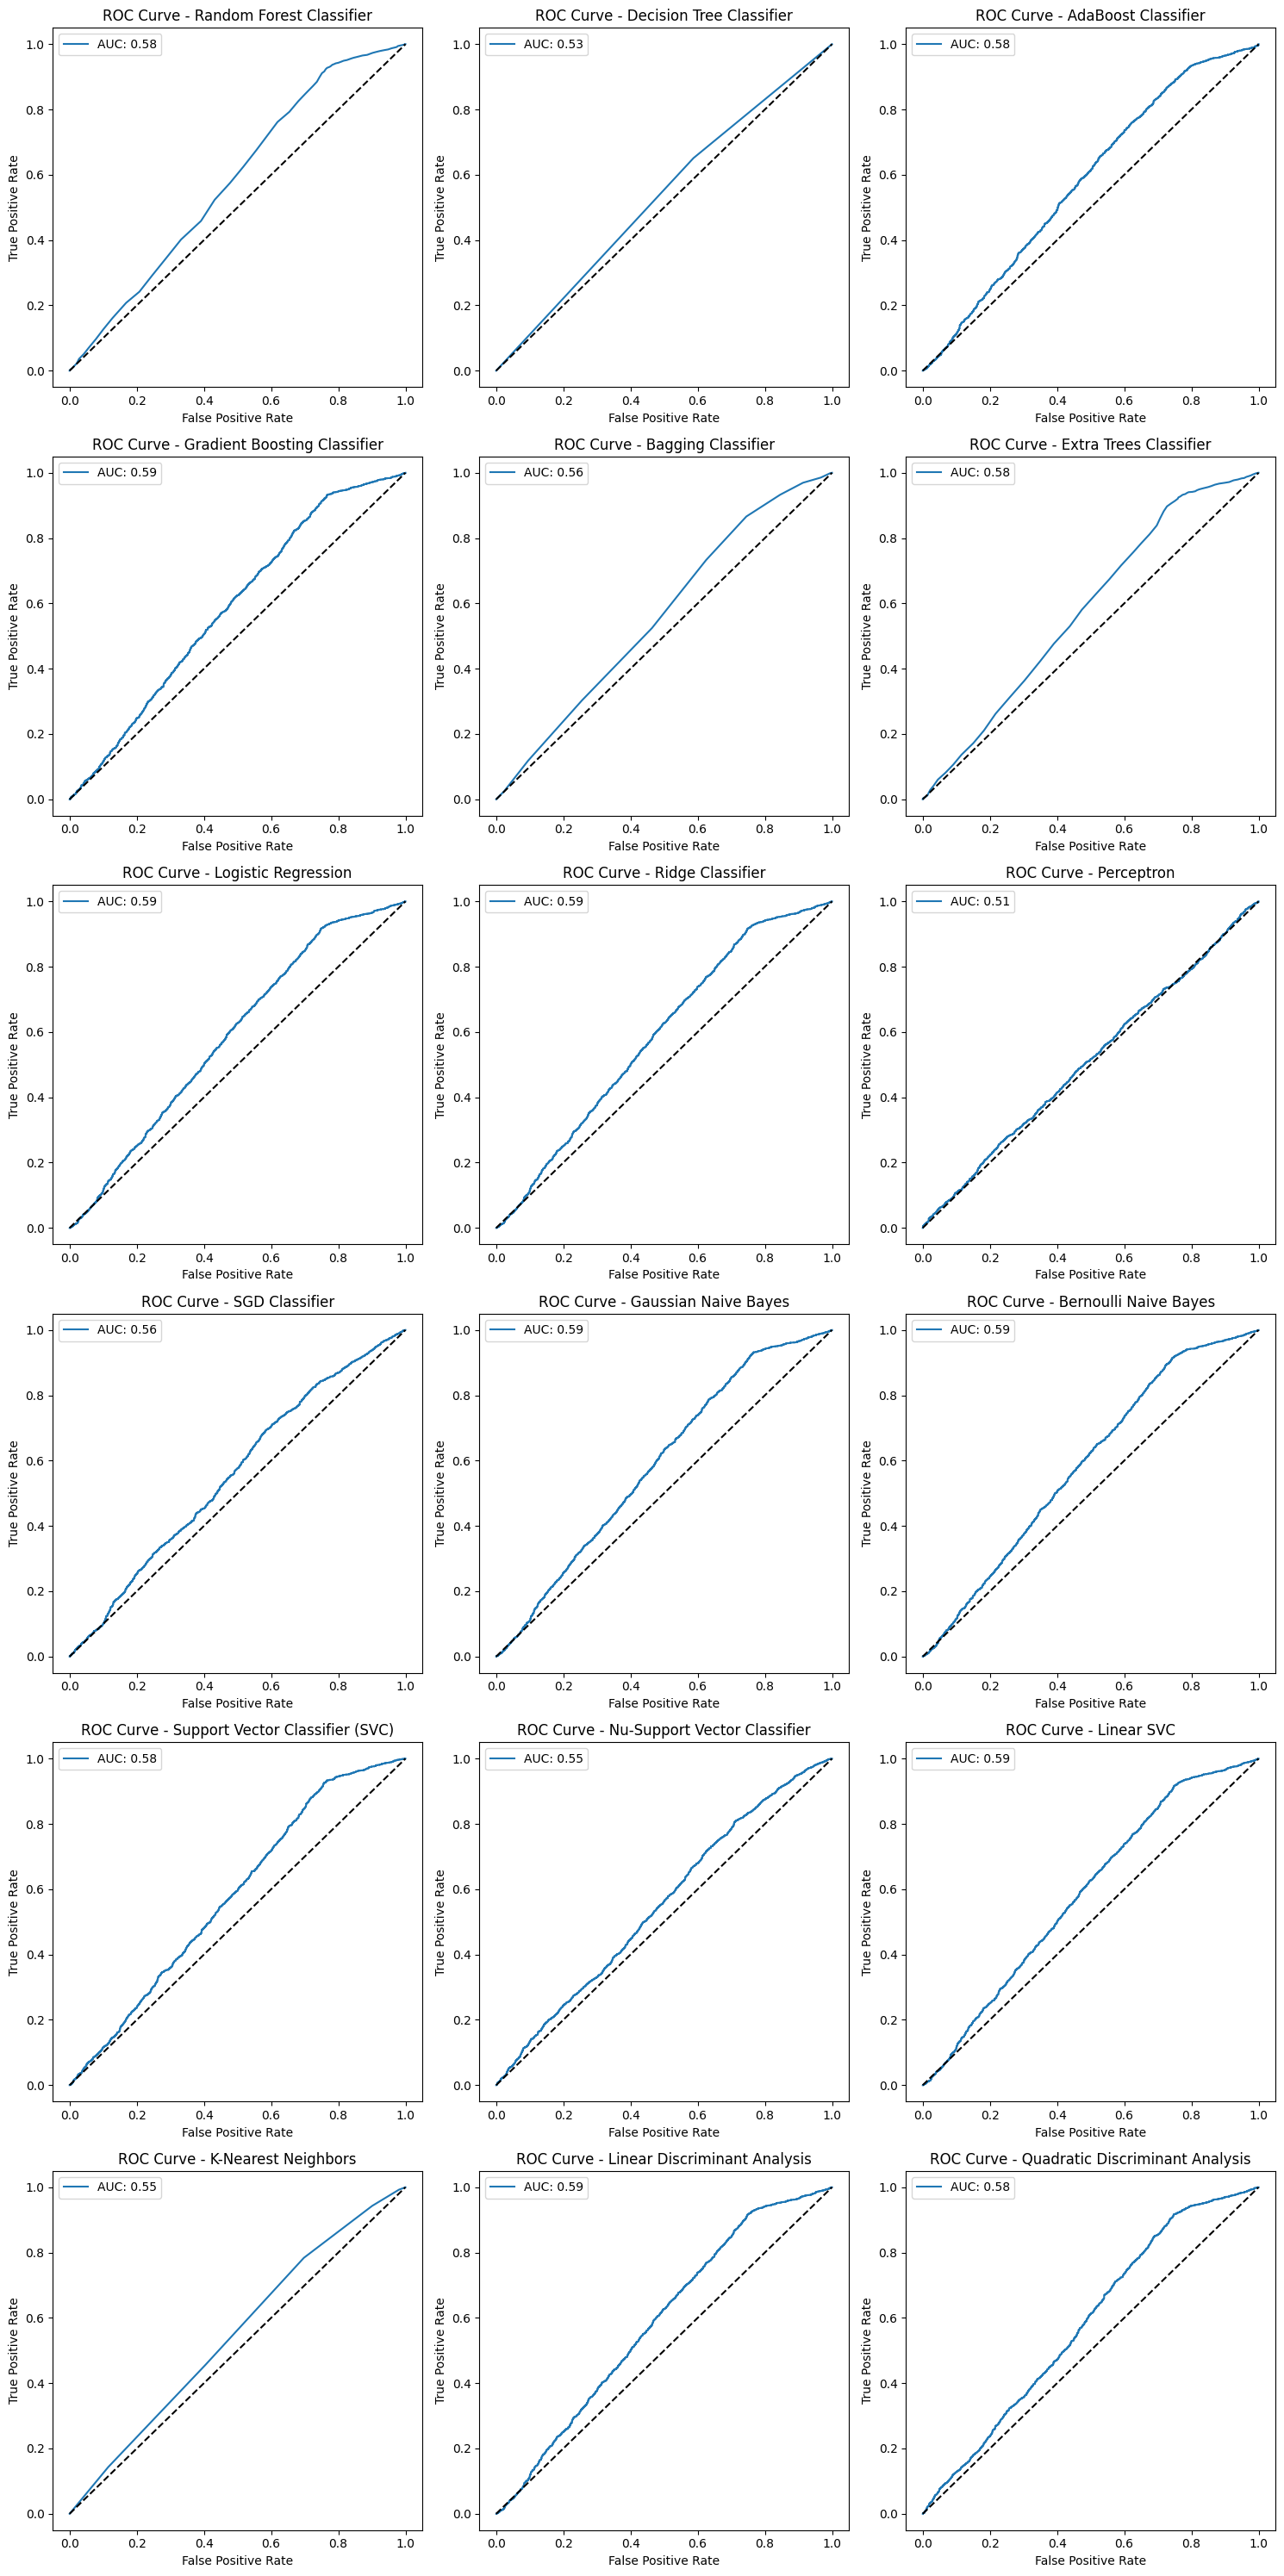

In [15]:
num_models = len(models)
rows = (num_models // 3) + (num_models % 3 > 0) 
plt.figure(figsize=(15, 5 * rows))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(x_train, y_train)
    
    if hasattr(model, "predict_proba"):  
        y_prob = model.predict_proba(x_test)[:, 1] 
    else:  
        y_prob = model.decision_function(x_test)
        y_prob = (y_prob - np.min(y_prob)) / (np.max(y_prob) - np.min(y_prob))

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    plt.subplot(rows, 3, i)
    plt.plot(fpr, tpr, label=f"AUC: {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()

plt.tight_layout()
plt.show()

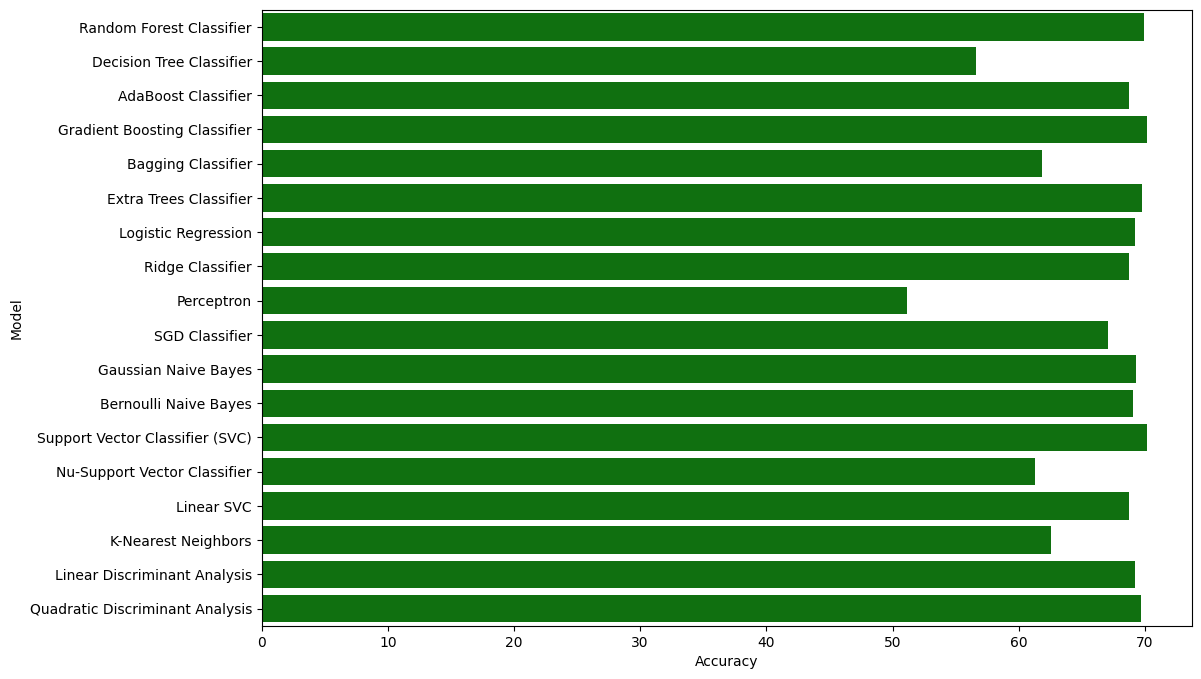

In [25]:
plt.figure(figsize=(12,8))
results=pd.DataFrame(metrics)
sns.barplot(x="Accuracy",y="Model",data=results,color="green")
plt.show()